In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
d=pd.read_csv('auto.csv')
d.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


# 1. Identify dimension,structure and summary:

In [7]:
d.shape

(205, 26)

In [8]:
d.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [10]:
d.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


# 2. Preprocess and treat missing values:

In [67]:
dn = pd.read_csv('auto.csv',na_values=['na','?'])
dn.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### Approaches to treat missing values:

In [16]:
# a.Remove missing values:
dataa=dn.dropna()
dataa.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101.0,5800.0,23,29,16430.0


In [65]:
# b. Replace with appropriate values:
# dn['normalized-losses'].fillna(dn['normalized-losses'].median(), inplace=True)
# dn

dn['normalized-losses'].fillna(dn['normalized-losses'].mean(),inplace=True)
dn.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# 3. Plot histogram for continuous variables(at least two) to analyse the data 

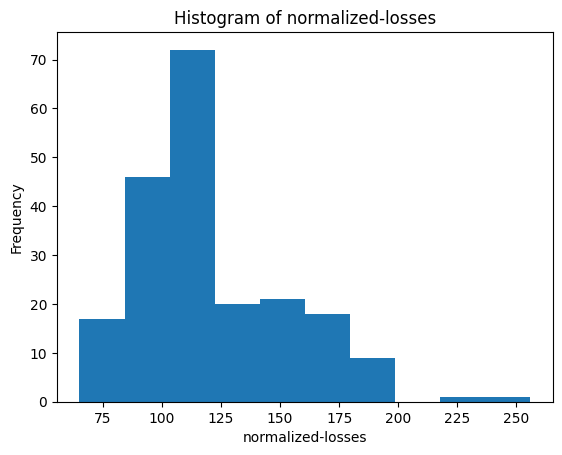

In [61]:
column1 = 'normalized-losses'
column2 = 'horsepower'

# Plot histograms
plt.hist(dn[column1], bins=10)
plt.xlabel(column1)
plt.ylabel('Frequency')
plt.title('Histogram of ' + column1)
plt.show()



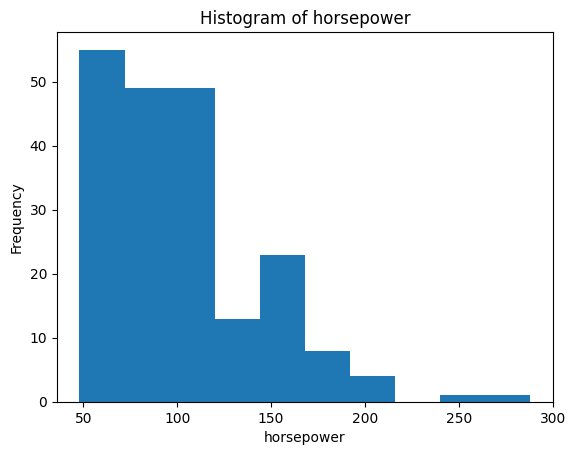

In [68]:
plt.hist(dn[column2], bins=10)
plt.xlabel(column2)
plt.ylabel('Frequency')
plt.title('Histogram of ' + column2)
plt.show()



# 4.Draw a violin plot to describe the distribution of a numerical variable to analyze the data:

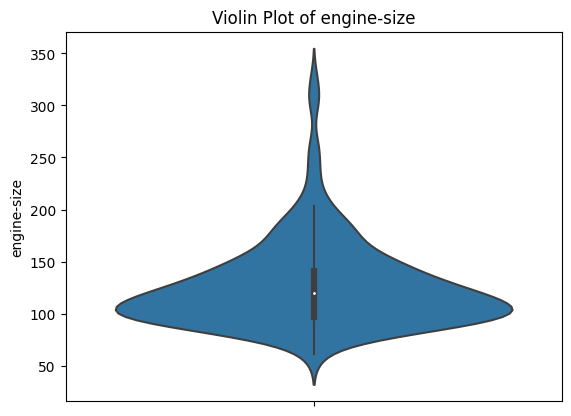

In [39]:
import seaborn as sns

# Select a numerical variable
column = 'engine-size'

# Draw a violin plot
sns.violinplot(data=dn, y=column)
plt.ylabel(column)
plt.title('Violin Plot of ' + column)
plt.show()


# 5.Recognize the outliers using a box plot (display box plot before and after outlier treatment):

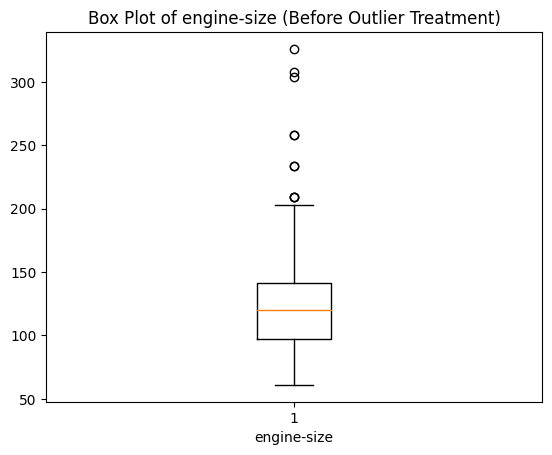

In [41]:
# Draw a box plot before outlier treatment
plt.boxplot(dn['engine-size'])
plt.xlabel('engine-size')
plt.title('Box Plot of engine-size (Before Outlier Treatment)')
plt.show()


In [43]:
# Handle outliers (e.g., removing values above a certain threshold)
threshold = 400
data = dn[dn['engine-size'] < threshold]

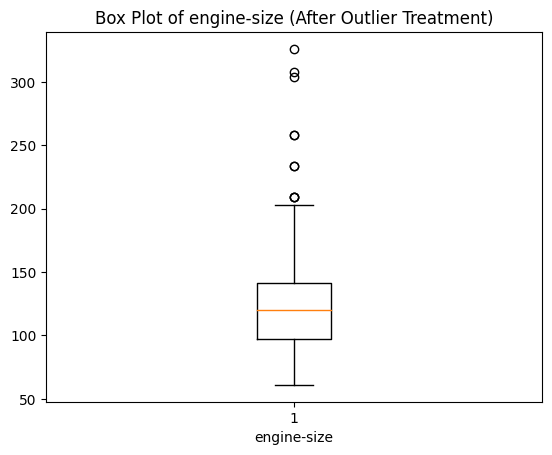

In [44]:
# Draw a box plot after outlier treatment
plt.boxplot(data['engine-size'])
plt.xlabel('engine-size')
plt.title('Box Plot of engine-size (After Outlier Treatment)')
plt.show()

# 6.Display a heatmap to show the relationship among the attributes:


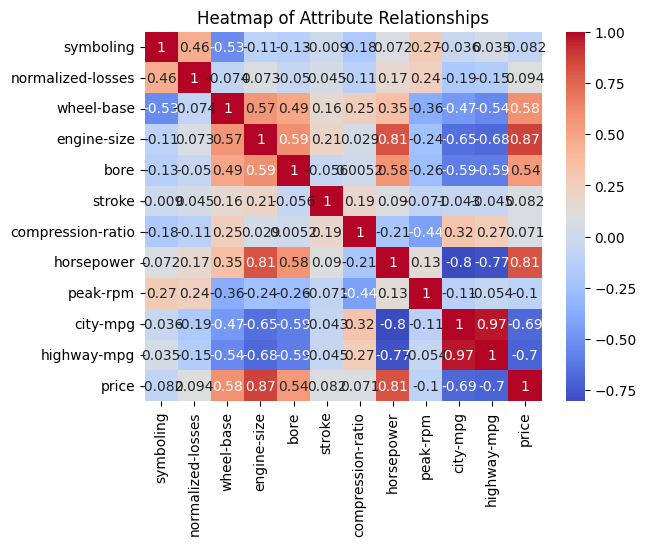

In [48]:
# Select only numeric columns
numeric_columns = ['symboling', 'normalized-losses', 'wheel-base', 'engine-size', 'bore', 'stroke', 'compression-ratio',
                   'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

# Calculate the correlation matrix
correlation_matrix = dn[numeric_columns].corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Attribute Relationships')
plt.show()

# 7.Standardize the continuous variable:


In [55]:
from sklearn.preprocessing import StandardScaler

# Select the continuous variable(s) to be standardized
columns = ['engine-size', 'city-mpg']

# Create a scaler object
scaler = StandardScaler()

# Standardize the continuous variable(s)
data[columns] = scaler.fit_transform(data[columns])

